# MATH 210 Introduction to Mathematical Computing

**March 12, 2025**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Order of Accuracy

In [6]:
def odeEuler(f,t,y0):
    N = len(t) - 1
    y = np.zeros(N+1)
    y[0] = y0
    for n in range(N):
        y[n+1] = y[n] + f(t[n],y[n])*(t[n + 1] - t[n])
    return y
    
def odeHeun(f,t,y0):
    N = len(t) - 1
    y = np.zeros(N+1)
    y[0] = y0
    for n in range(N):
        h = t[n + 1] - t[n]
        k1 = f(t[n],y[n])
        k2 = f(t[n] + h,y[n] + k1*h)
        y[n + 1] = y[n] + (k1 + k2)/2*h
    return y

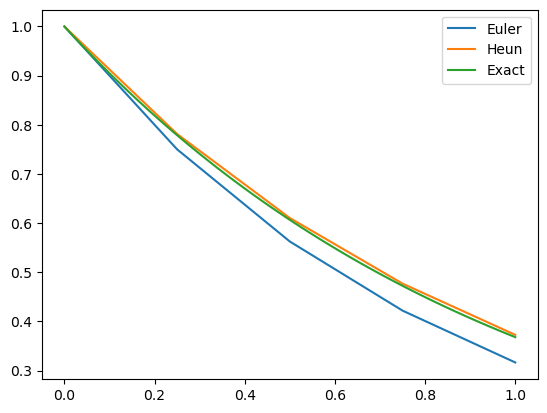

In [10]:
f = lambda t,y: -y
y0 = 1
t = np.linspace(0,1,5)
y1 = odeEuler(f,t,y0)
plt.plot(t,y1)

y2 = odeHeun(f,t,y0)
plt.plot(t,y2)

ts = np.linspace(0,1,100)
ys = np.exp(-ts)
plt.plot(ts,ys)
plt.legend(['Euler','Heun','Exact'])
plt.show()

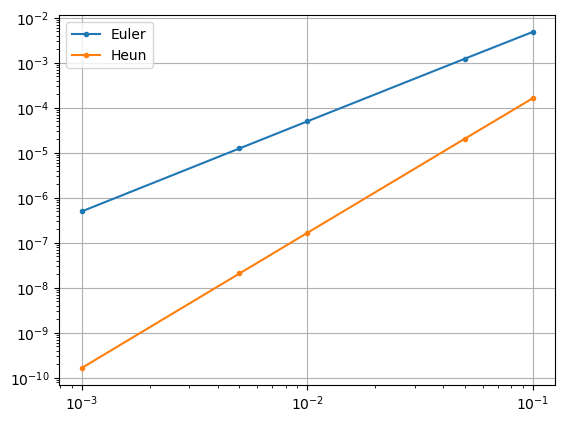

In [16]:
hs = [0.1,0.05,0.01,0.005,0.001]
E1s = []
E2s = []
for h in hs:
    y1 = odeEuler(f,[0,h],1)
    E1 = np.abs(np.exp(-h) - y1[1])
    y2 = odeHeun(f,[0,h],1)
    E2 = np.abs(np.exp(-h) - y2[1])
    E1s.append(E1)
    E2s.append(E2)
plt.loglog(hs,E1s,'.-')
plt.loglog(hs,E2s,'.-')
plt.legend(['Euler','Heun']), plt.grid(True)
plt.show()